In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf
import pandas as pd
import datetime

# Define the start and end dates
start = '2014-01-01'
end = '2024-01-01'

# Fetch the data
df = yf.download('AAPL', start=start, end=end)

# Display the first few rows of the dataframe
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273232,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893803,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985926,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864454,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971254,258529600


In [3]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273232,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893803,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985926,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864454,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971254,258529600


In [4]:
df = df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,19.845715,19.893929,19.715000,19.754642,234684800
1,19.745001,19.775000,19.301071,19.320715,392467600
2,19.194643,19.528570,19.057142,19.426071,412610800
3,19.440001,19.498571,19.211430,19.287144,317209200
4,19.243214,19.484285,19.238930,19.409286,258529600


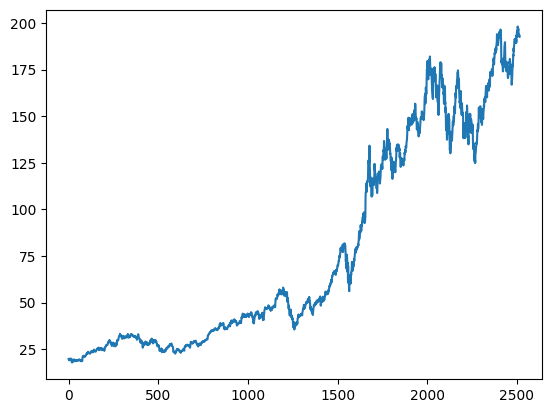

In [5]:
plt.plot(df.Close)

In [6]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()

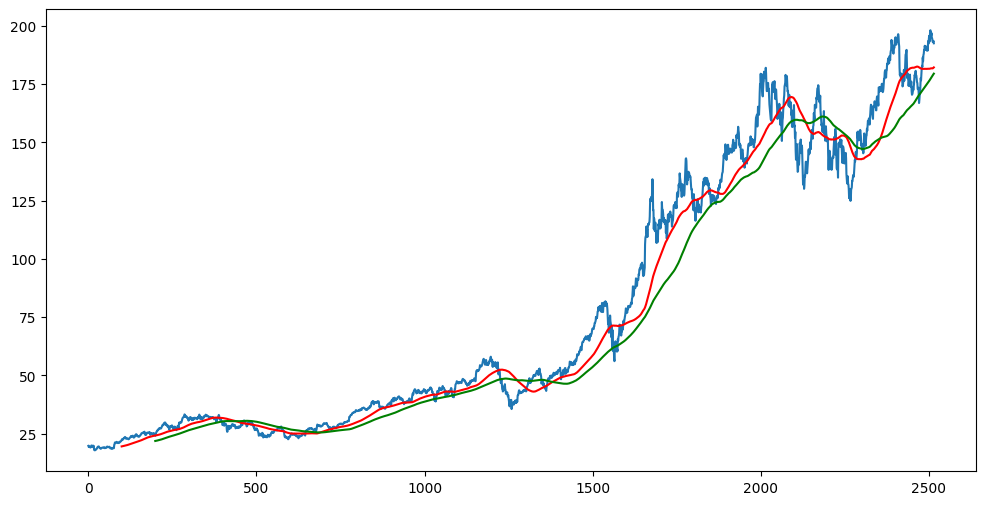

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'red') #Can modify the moving avg
plt.plot(ma200,'g')

In [8]:
#Splitting Data
train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
test = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
print(train.shape)
print(test.shape)

(1761, 1)
(755, 1)


In [9]:
#Scale Down data for LSTM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
train_arr = scaler.fit_transform(train)
train_arr

array([[0.01603287],
       [0.01238153],
       [0.01326806],
       ...,
       [0.96028296],
       [1.        ],
       [0.98468532]])

In [11]:
x_train =[]
y_train =[]

for i in range(100, train_arr.shape[0]):
   x_train.append(train_arr[i-100:i])
   y_train.append(train_arr[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [12]:
#Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [15]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2)) #First Layer
#unit->No. of Neurons,
#activation-> Neuron type to LSTM
#return_sequnces->No. of output=No. of Input, Useful while Stacking
#X_train[1]->No. of time_steps here 100, 1->no. of feature here close
#Dropout->Randomly setting certain outputs to 0 ->prevents overfitting
model.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) #Connecting all the layers


In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_4 (LSTM)               (None, 120)              

In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 20s 260ms/step - loss: 0.0234
Epoch 2/50
52/52 [==============================] - 14s 262ms/step - loss: 0.0045
Epoch 3/50
52/52 [==============================] - 14s 260ms/step - loss: 0.0045
Epoch 4/50
52/52 [==============================] - 13s 258ms/step - loss: 0.0039
Epoch 5/50
52/52 [==============================] - 14s 262ms/step - loss: 0.0040
Epoch 6/50
52/52 [==============================] - 16s 301ms/step - loss: 0.0032
Epoch 7/50
52/52 [==============================] - 13s 260ms/step - loss: 0.0037
Epoch 8/50
52/52 [==============================] - 14s 261ms/step - loss: 0.0033
Epoch 9/50
52/52 [==============================] - 14s 261ms/step - loss: 0.0029
Epoch 10/50
52/52 [==============================] - 14s 261ms/step - loss: 0.0029
Epoch 11/50
52/52 [==============================] - 14s 261ms/step - loss: 0.0033
Epoch 12/50
52/52 [==============================] - 13s 260ms/step - loss: 0.0031
Epoch 13/50
5

In [18]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
past_100_days = train.tail(100)
past_100_days

,Close
1661,111.112503
1662,112.727501
1663,109.375000
1664,113.010002
1665,115.010002
...,...
1756,131.880005
1757,130.960007
1758,131.970001
1759,136.690002


In [21]:
final_df = pd.concat([past_100_days, test], ignore_index=True)


In [22]:
final_df

,Close
0,111.112503
1,112.727501
2,109.375000
3,113.010002
4,115.010002
...,...
850,193.600006
851,193.050003
852,193.149994
853,193.580002


In [23]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.04681173],
       [0.06450646],
       [0.02777477],
       [0.06760168],
       [0.08951469],
       [0.08839163],
       [0.08510465],
       [0.09556813],
       [0.09715679],
       [0.12528766],
       [0.19206755],
       [0.2083653 ],
       [0.1970527 ],
       [0.21565138],
       [0.19907971],
       [0.19686102],
       [0.24323431],
       [0.29955073],
       [0.26909167],
       [0.1538293 ],
       [0.15470584],
       [0.06551992],
       [0.11482418],
       [0.07286076],
       [0.05653559],
       [0.09334945],
       [0.09532162],
       [0.05795991],
       [0.03834776],
       [0.        ],
       [0.03549913],
       [0.05445383],
       [0.00306789],
       [0.01512003],
       [0.0596034 ],
       [0.08896683],
       [0.07943464],
       [0.09827984],
       [0.10901725],
       [0.06771119],
       [0.10583985],
       [0.06924517],
       [0.09028164],
       [0.08907642],
       [0.11098942],
       [0.19239623],
       [0.15623974],
       [0.157

In [24]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])


In [25]:
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)

(755, 100, 1)


In [26]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 73ms/step


In [28]:
factor = scaler.scale_
y_predicted = y_predicted/factor
y_test = y_test/factor

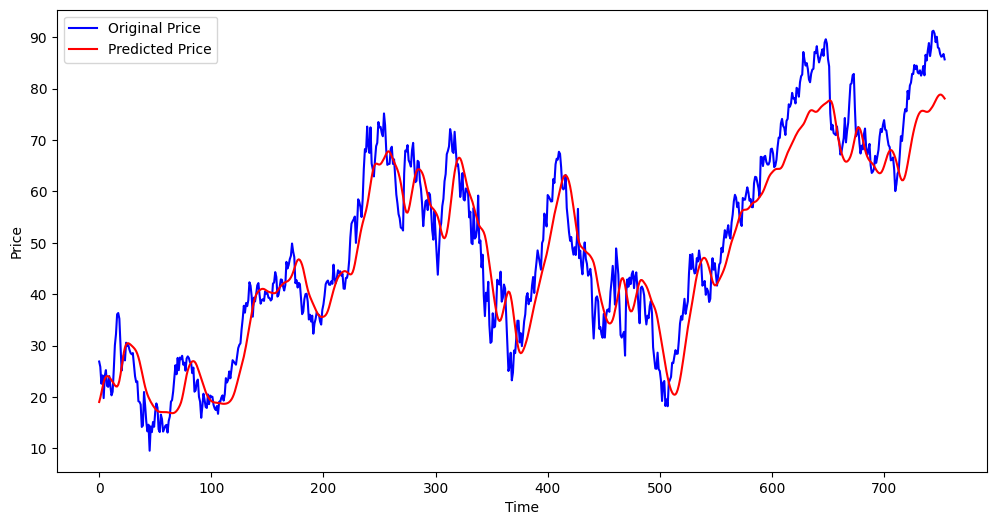

In [29]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()